# Data analyse in Python 2

The United States Social Security Administration, shortly SSA, serves a dataset collects the frequency of baby names from 1880 till 2010. 

We will use this dataset to do some simple evaluations.

Please download the **National data** from ths SSA (https://www.ssa.gov/oact/babynames/limits.html)


In [42]:
import pandas as pd
import numpy as np
%matplotlib inline

## Load data

In [2]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

In [8]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


We can group them by sex

In [17]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [9]:
names1880.groupby('sex').births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

While the data are seperated in files according to the year, the first thing to do is to put all data in one dataframe.

In [12]:
years = range(1880, 2001)

In [13]:
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [21]:
names = pd.concat(pieces, ignore_index=True)

Notice that, we must set the ignore_index to True, since we don't want to maintain the index of the diffrent frames.

In [20]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [22]:
total_births = names.pivot_table('births', index='year', columns=['sex'], aggfunc=sum)

In [26]:
total_births.tail()

sex,F,M
year,,
1996,1752455,1893664
1997,1740104,1884461
1998,1766237,1910601
1999,1772978,1919175
2000,1814922,1962744


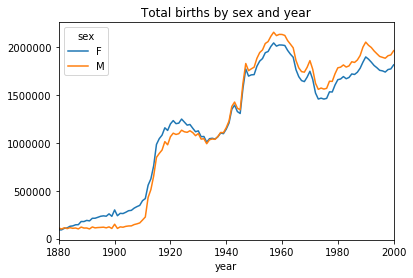

In [29]:
total_births.plot(title='Total births by sex and year')

Insert a column called 'prop' to indicate the propotion of the frequency

In [32]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [34]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


validate the calculation by checking the sum  of propotion.

In [45]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In order to step forward, we need a sub dataset. We will use the top 1000 data.

In [49]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [53]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 241877 entries, (1880, F, 0) to (2000, M, 1351342)
Data columns (total 5 columns):
name      241877 non-null object
sex       241877 non-null object
births    241877 non-null int64
year      241877 non-null int64
prop      241877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.5+ MB


We can now analyse the naming trend using these data.

In [57]:
boys = top1000[top1000.sex == 'M']

In [59]:
girls = top1000[top1000.sex == 'F']

In [61]:
boys.head()

name sex  births  year      prop
year sex                                         
1880 M   942     John   M    9655  1880  0.087383
         943  William   M    9532  1880  0.086269
         944    James   M    5927  1880  0.053642
         945  Charles   M    5348  1880  0.048402
         946   George   M    5126  1880  0.046393

In [77]:
total_births = top1000.pivot_table('births', index='year', columns=['name'], aggfunc=sum)

In [78]:
total_births.head()

name,Aaliyah,Aaron,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,Abbott,Abby,...,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,102.0,NaN,NaN,NaN,NaN,71.0,NaN,NaN,6.0,...,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0
1881,NaN,94.0,NaN,NaN,NaN,NaN,81.0,NaN,NaN,7.0,...,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0
1882,NaN,85.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,11.0,...,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0
1883,NaN,105.0,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN,...,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0
1884,NaN,97.0,NaN,NaN,NaN,NaN,98.0,NaN,NaN,6.0,...,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0


In [64]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

In [79]:
subset.head()

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8178.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9428.0,2338.0,9253.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ab9fc88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12acc5d68>], dtype=object)

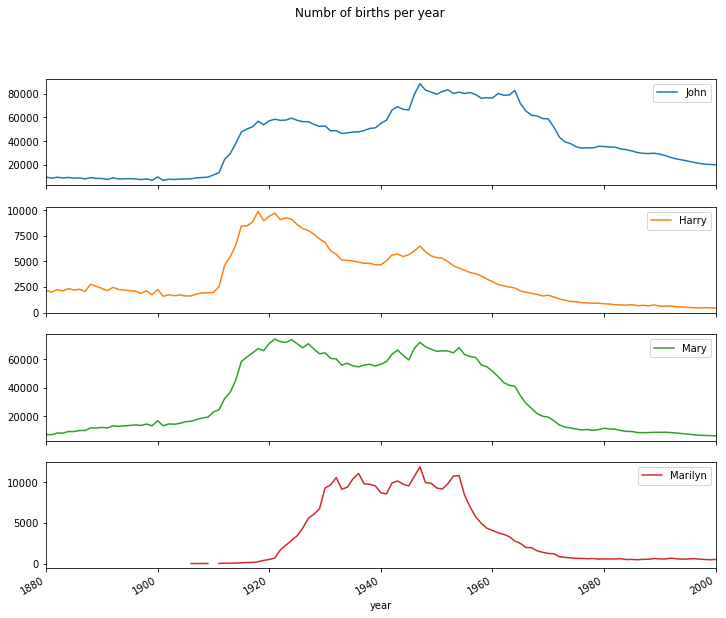

In [70]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Numbr of births per year")

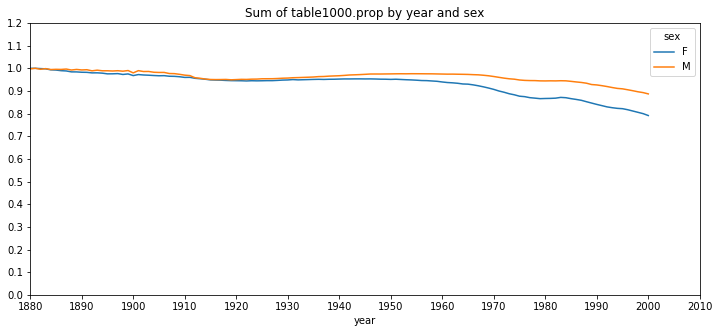

In [83]:
table = top1000.pivot_table('prop', index='year', columns=['sex'], aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10), figsize=(12,5))